## Visualization

 1. [Bar chart of 'configure+build+test' times by site by extension](#plot_1)
 2. [Gantt chart of |configure, build, test| times by extension (ordered by start times)](#plot_2)


In [1]:
from IPython.display import display, HTML 
def section(_id):
    print("Adding <a id='%s'></a>" % _id)
    display(HTML("<a id='%s'></a>" % _id))

In [2]:
! pip install arrow

In [3]:
! rm -f filterdataFunctions.php && wget -nv "https://raw.githubusercontent.com/Kitware/CDash/master/include/filterdataFunctions.php" 2>&1

2016-04-29 16:47:04 URL:https://raw.githubusercontent.com/Kitware/CDash/master/include/filterdataFunctions.php [32104/32104] -> "filterdataFunctions.php" [1]


In [4]:
%%bash

generate_api=false

if [[ $generate_api == true ]];  then

    while read rawdef; do
        echo ""
        field=$(echo $rawdef | cut -d"'" -f2);
        field_pretty_name=$(echo $rawdef | cut -d"'" -f4);
        operator_type=$(echo $rawdef | cut -d"'" -f6);
        #echo "field=$field";
        #echo "field_pretty_name=$field_pretty_name";
        #echo "operator_type=$operator_type";

        echo "    def $field(self, value, operator=IS):"
        echo "        field = \"$field\""
        echo "        self._check(field, QueryBuilder.${operator_type^^}_OPERATORS.keys(), operator)"
        echo "        self._add(field, QueryBuilder.${operator_type^^}_OPERATORS[operator], value)"
        echo "        return self"

    done <<< "$(cat ./filterdataFunctions.php  | egrep  "^[^//]+getFilterDefinitionXML\('" | sort | uniq)";
fi

In [5]:
import arrow
import collections

class QueryBuilder(object):
    """
    Pythonic interface allowing to generate CDash API filtering query parameters.
    """
    
    
    """
    Type of operators that can be used to select values associated
    with a filter.
    """
    IS               = "IS"
    IS_NOT           = "IS_NOT"
    IS_GREATER_THAN  = "IS_GREATER_THAN"
    IS_LESSER_THAN   = "IS_LESSER_THAN"
    CONTAINS         = "CONTAINS"
    DOES_NOT_CONTAIN = "DOES_NOT_CONTAIN"
    STARTS_WITH      = "STARTS_WITH"
    ENDS_WITH        = "ENDS_WITH"
    
    """
    Type of filter combination.
    """
    AND = "and"
    OR = "or"

    
    def __init__(self, project, filtercombine=AND, date=None):
        self._project = project
        self._filtercombine = filtercombine
        self._date = arrow.now('US/Eastern').format('YYYY-MM-DD') if date is None else date
        self._filters = []
    
    def _check(self, field, acceptableOperators, operator):
        if operator not in acceptableOperators:
            raise Exception("Field '%s' is associated with an invalid operator '%s'."
                            "Acceptable operators are %s." % (field, operator, ", ".join(acceptableOperators)))
            
    def _add(self, field, operator_id, value):
        self._filters.append({'field': field, 'compare': operator_id, 'value': value})
    
    def params(self):
        
        params = collections.OrderedDict()
        params['project'] = self._project
        params['date'] = self._date
        params['filtercount'] = len(self._filters)
        params['filtercombine'] = self._filtercombine
        for (index, _filter) in enumerate(self._filters, start=1):
            params['field%d' % index]= _filter['field']
            params['compare%d' % index]= _filter['compare']
            params['value%d' % index]= _filter['value']
        return params
    
    def __repr__(self):
        pass
        
    
    # START: List of query building functions automatically generated
    
    def buildduration(self, value, operator=IS):
        field = "buildduration"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def builderrors(self, value, operator=IS):
        field = "builderrors"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def buildgenerator(self, value, operator=IS):
        field = "buildgenerator"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def buildname(self, value, operator=IS):
        field = "buildname"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def buildstamp(self, value, operator=IS):
        field = "buildstamp"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def buildstarttime(self, value, operator=IS):
        field = "buildstarttime"
        self._check(field, QueryBuilder.DATE_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.DATE_OPERATORS[operator], value)
        return self

    def buildtype(self, value, operator=IS):
        field = "buildtype"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def buildwarnings(self, value, operator=IS):
        field = "buildwarnings"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def configureduration(self, value, operator=IS):
        field = "configureduration"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def configureerrors(self, value, operator=IS):
        field = "configureerrors"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def configurewarnings(self, value, operator=IS):
        field = "configurewarnings"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def coveredlines(self, value, operator=IS):
        field = "coveredlines"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def details(self, value, operator=IS):
        field = "details"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def expected(self, value, operator=IS):
        field = "expected"
        self._check(field, QueryBuilder.BOOL_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.BOOL_OPERATORS[operator], value)
        return self

    def filename(self, value, operator=IS):
        field = "filename"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def groupname(self, value, operator=IS):
        field = "groupname"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def hascoverage(self, value, operator=IS):
        field = "hascoverage"
        self._check(field, QueryBuilder.BOOL_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.BOOL_OPERATORS[operator], value)
        return self

    def hasctestnotes(self, value, operator=IS):
        field = "hasctestnotes"
        self._check(field, QueryBuilder.BOOL_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.BOOL_OPERATORS[operator], value)
        return self

    def hasdynamicanalysis(self, value, operator=IS):
        field = "hasdynamicanalysis"
        self._check(field, QueryBuilder.BOOL_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.BOOL_OPERATORS[operator], value)
        return self

    def hasusernotes(self, value, operator=IS):
        field = "hasusernotes"
        self._check(field, QueryBuilder.BOOL_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.BOOL_OPERATORS[operator], value)
        return self

    def label(self, value, operator=IS):
        field = "label"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def labels(self, value, operator=IS):
        field = "labels"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def priority(self, value, operator=IS):
        field = "priority"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def site(self, value, operator=IS):
        field = "site"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def status(self, value, operator=IS):
        field = "status"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def subproject(self, value, operator=IS):
        field = "subproject"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def testname(self, value, operator=IS):
        field = "testname"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def testsduration(self, value, operator=IS):
        field = "testsduration"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def testsfailed(self, value, operator=IS):
        field = "testsfailed"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def testsnotrun(self, value, operator=IS):
        field = "testsnotrun"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def testspassed(self, value, operator=IS):
        field = "testspassed"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def testtimestatus(self, value, operator=IS):
        field = "testtimestatus"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def timestatus(self, value, operator=IS):
        field = "timestatus"
        self._check(field, QueryBuilder.STRING_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.STRING_OPERATORS[operator], value)
        return self

    def time(self, value, operator=IS):
        field = "time"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def totallines(self, value, operator=IS):
        field = "totallines"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def uncoveredlines(self, value, operator=IS):
        field = "uncoveredlines"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def updatedfiles(self, value, operator=IS):
        field = "updatedfiles"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self

    def updateduration(self, value, operator=IS):
        field = "updateduration"
        self._check(field, QueryBuilder.NUMBER_OPERATORS.keys(), operator)
        self._add(field, QueryBuilder.NUMBER_OPERATORS[operator], value)
        return self
    
    # END: List of query building functions automatically generated
    
    # Comparison types - From js/cdashFilters.js and CDash/public/filterdataTemplate.xsl
    # Field types      - From include/filterdataFunctions.php / getFilterDefinitionsXML()
    _BOOL_IS_TRUE = 1
    _BOOL_IS_FALSE = 2
    BOOL_OPERATORS = {
        IS     : _BOOL_IS_TRUE,
        IS_NOT : _BOOL_IS_FALSE
    }
    BOOL_TYPE = 'bool'
    
    _DATE_IS = 81
    _DATE_IS_NOT = 82
    _DATE_IS_AFTER = 83
    _DATE_IS_BEFORE = 84
    DATE_OPERATORS = {
        IS              : _DATE_IS,
        IS_NOT          : _DATE_IS_NOT,
        IS_GREATER_THAN : _DATE_IS_AFTER,
        IS_LESSER_THAN  : _DATE_IS_BEFORE
    }
    DATE_TYPE = ''
    
    _NUMBER_IS = 41
    _NUMBER_IS_NOT = 42
    _NUMBER_IS_GREATER_THAN = 43
    _NUMBER_IS_LESS_THAN = 44
    NUMBER_OPERATORS = {
        IS              : _NUMBER_IS,
        IS_NOT          : _NUMBER_IS_NOT,
        IS_GREATER_THAN : _NUMBER_IS_GREATER_THAN,
        IS_LESSER_THAN  : _NUMBER_IS_LESS_THAN
    }
    NUMBER_TYPE = 'float'
    
    _STRING_IS = 61
    _STRING_IS_NOT = 62
    _STRING_CONTAINS = 63
    _STRING_DOES_NOT_CONTAIN = 64
    _STRING_STARTS_WITH = 65
    _STRING_ENDS_WITH = 66
    STRING_OPERATORS = {
        IS               : _STRING_IS,
        IS_NOT           : _STRING_IS_NOT,
        CONTAINS         : _STRING_CONTAINS,
        DOES_NOT_CONTAIN : _STRING_DOES_NOT_CONTAIN,
        STARTS_WITH      : _STRING_STARTS_WITH,
        ENDS_WITH        : _STRING_ENDS_WITH
    }
    STRING_TYPE = 'float'

In [6]:
import requests
from urllib.parse import urlparse

class Downloader(QueryBuilder):
    
    def __init__(self, url, project, filtercombine=QueryBuilder.AND, date=None):
        QueryBuilder.__init__(self, project, filtercombine, date)
        parsed_url = urlparse(url)
        sheme = parsed_url.scheme if parsed_url.scheme else 'http'
        netloc = parsed_url.netloc if parsed_url.netloc else parsed_url.path
        self._api_url = sheme + "://" + netloc + '/api/v1'
        self._debug = False
    
    def debug(self, value=True):
        self._debug = value
        return self
    
    def _print_debug(self, title, content):
        if self._debug:
            print("*" * 20 + title  + "*" * 20)
            print(content)
        
    @staticmethod
    def _submissions(data):
        info = []
        if data is None:
            return info
        for group in data['buildgroups']:
            info.extend(group['builds'])
        return info
    
    def __call__(self):
        return self.data()
    
    def data(self):
        if not hasattr(self, '_data'):
            req = requests.get(self._api_url + "/index.php", params=self.params())
            self._print_debug("req.url", req.url)
            self._data = req.json()
            self._print_debug("self._data", self._data)
        return Downloader._submissions(self._data)


In [7]:
import collections
from datetime import timedelta
import re

class Transformer(object):
    
    def __init__(self, data):
        self._data = data
        self._transformed_data = collections.OrderedDict()
        self._debug = False
    
    @staticmethod
    def _collect_step_values(data, step_name, key, update=lambda value: value):
        values = []
        for submission in data:
            if step_name in submission and key in submission[step_name]:
                values.append(update(submission[step_name][key]))
            else:
                values.append(update(None))
        return values

    _DURATION_REGEX = re.compile(r'((?P<hours>\d+?)h )?((?P<minutes>\d+?)m )?((?P<seconds>\d+?)s)?')

    @staticmethod
    def parse_duration(time_str):
        """Adapted from http://stackoverflow.com/questions/4628122/how-to-construct-a-timedelta-object-from-a-simple-string
        """
        parts = Transformer._DURATION_REGEX.match(time_str)
        if not parts:
            return
        parts = parts.groupdict()
        time_params = {}
        for (name, param) in parts.items():
            if param:
                time_params[name] = int(param)
        return timedelta(**time_params)
    
    def data(self):
        return self._data
    
    def __call__(self, orient='columns'):
        return self.transformed_data(orient)
    
    def transformed_data(self, orient='columns'):
        orients = ['columns', 'records']
        if orient not in orients:
            raise Exception("'orient' parameter set to invalid value '%s'."
                            "Acceptable values are %s." % (orient, ", ".join(orients)))
        if orient == 'records':
            for values in zip(*(self._filtered_df.values())):
                record = {}
                for (idx, column) in enumerate(a.keys()): record.update({column: str(values[idx])})
                records.append(record)
            return records
        else:
            return self._transformed_data
    
    def __repr__(self):
        return self.stats().__repr__() if len(self.stats()) > 0 else self.data().__repr__()

    def sites(self, update=lambda text:text):
        self._transformed_data['sites'] = [update(submission['site']) for submission in self.data()]
        return self
    
    def labels(self, update=lambda text:text):
        self._transformed_data['labels'] = [update(submission['label']) for submission in self.data()]
        return self
    
    def names(self, update=lambda text:text):
        self._transformed_data['names'] = [update(submission['buildname']) for submission in self.data()]
        return self
    
    def start_times(self, update=lambda value:value):
        self._transformed_data['start_times'] = [update(submission['builddatefull']) for submission in self.data()]
        return self
    
    _update_timedelta = lambda value: Transformer.parse_duration(value) if value else timedelta()

    def configure_times(self, update=lambda value:value):
        self._transformed_data['configure_times'] = update(
            Transformer._collect_step_values(self.data(), 'configure', 'time', Transformer._update_timedelta))
        return self
    
    def build_times(self, update=lambda value:value):
        self._transformed_data['build_times'] = update(
            Transformer._collect_step_values(self.data(), 'compilation', 'time', Transformer._update_timedelta))
        return self
    
    def test_times(self, update=lambda value:value):
        self._transformed_data['test_times'] = update(
            Transformer._collect_step_values(self.data(), 'test', 'time', Transformer._update_timedelta))
        return self
    
    def configure_warnings(self, update=lambda value:value):
        self._transformed_data['configure_warnings'] = update(
            Transformer._collect_step_values(self.data(), 'configure', 'warning', lambda value: value if value else 0))
        return self
    
    def configure_errors(self, update=lambda value:value):
        self._transformed_data['configure_errors'] = update(
            Transformer._collect_step_values(self.data(), 'configure', 'error', lambda value: value if value else 0))
        return self
    
    def build_warnings(self, update=lambda value:value):
        self._transformed_data['build_warnings'] = update(
            Transformer._collect_step_values(self.data(), 'compilation', 'warning', lambda value: value if value else 0))
        return self
    
    def build_errors(self, update=lambda value:value):
        self._transformed_data['build_errors'] = update(
            Transformer._collect_step_values(self.data(), 'compilation', 'error', lambda value: value if value else 0))
        return self

In [8]:
import pandas as pd

def merge(_dfs, **kwargs):
    dfs = list(_dfs) # Copy
    #print(dfs)
    merged = None
    if len(dfs) > 0:
        merged = dfs.pop(0)
    while len(dfs) > 0:
        merged = pd.merge(merged, dfs.pop(0), **kwargs)
    return merged

In [9]:
url = "slicer.cdash.org"
project = "Slicer4"

sites = ['factory-south-ubuntu', 'factory-south-w', 'factory']
date = "2016-04-24"

sites_data = {}

for site in sites:
    print("Downloading '%s' site data..." % site)
    sites_data[site] = (
        Downloader(url, project, date=date).debug(False).
        site(site).
        groupname("Extensions-Nightly")()
    )
    
# pp(sites_data[site])

In [10]:
# Create dataframe with 
#  
#  * a hierarchical index of the form: <sites> ( <names> )
#
#  * data columns

sites_data_columns = ['start_times']

timedelta_columns = ['configure_times', 'build_times', 'test_times']
sites_data_columns.extend(timedelta_columns)

error_columns = ['configure_errors', 'build_errors']
sites_data_columns.extend(error_columns)

data_columns = list(sites_data_columns)

sites_df = None

for site, submission_data in sites_data.items():
    
    site_data = (Transformer(submission_data).
                 labels().
                 start_times(update=lambda value:pd.Timestamp(arrow.get(value).datetime)).
                 configure_times().build_times().test_times().
                 configure_errors().build_errors().transformed_data())
    
    # Keys for each level of indexing
    sites_index = [site]
    names_index = site_data['labels']
    
    # Explicit building of the index and association of names with each levels
    index = pd.MultiIndex.from_product([sites_index, names_index],
                                       names=['sites', 'names'])
    
    # Convert column based representation into list of tuples
    data_tuples = list(zip(*(site_data[key] for key in sites_data_columns)))
    
    # Create site dataframe with (1) list of data tuples and (2) hierarchical index
    site_df = (pd.DataFrame(data_tuples, index=index, columns=sites_data_columns))
    
    # Compute errors <= configure_errors + build_errors
    site_df['errors'] = site_df[error_columns].sum(axis=1)
    if 'errors' not in data_columns: data_columns.append('errors')
    
    print(" site_df: [%d rows x %d columns][%s]" % (*site_df.shape, site))
    
    if sites_df is None:
        sites_df = site_df
    else:
        sites_df = sites_df.merge(site_df, left_index=True, right_index=True, how='outer', on=data_columns)

print("sites_df: [%d rows x %d columns]" % (sites_df.shape))

 site_df: [86 rows x 7 columns][factory-south-w]
 site_df: [94 rows x 7 columns][factory]
 site_df: [82 rows x 7 columns][factory-south-ubuntu]
sites_df: [262 rows x 7 columns]


In [11]:
import numpy as np

# Sum values associated for the current site and 'times' index keys
print("For all extensions on %s :" % date)
for site in sites:
    print("  site: %s" % site)
    cumulative_times = sites_df.xs((site), level=('sites'))[timedelta_columns].sum() / np.timedelta64(1, 'h')
    for key in timedelta_columns:
        print("    %s: %.2f hrs" % (key, cumulative_times[key]))
    total = (sites_df.xs((site), level=('sites'))[timedelta_columns]).sum(axis=1).sum() / np.timedelta64(1, 'h')
    print("    (configure + build + test) time: %.2f hrs" % (total))
    print("")

For all extensions on 2016-04-24 :
  site: factory-south-ubuntu
    configure_times: 0.12 hrs
    build_times: 6.14 hrs
    test_times: 0.25 hrs
    (configure + build + test) time: 6.51 hrs

  site: factory-south-w
    configure_times: 0.52 hrs
    build_times: 5.70 hrs
    test_times: 0.64 hrs
    (configure + build + test) time: 6.86 hrs

  site: factory
    configure_times: 0.17 hrs
    build_times: 4.10 hrs
    test_times: 0.77 hrs
    (configure + build + test) time: 5.04 hrs



Adding <a id='plot_1'></a>


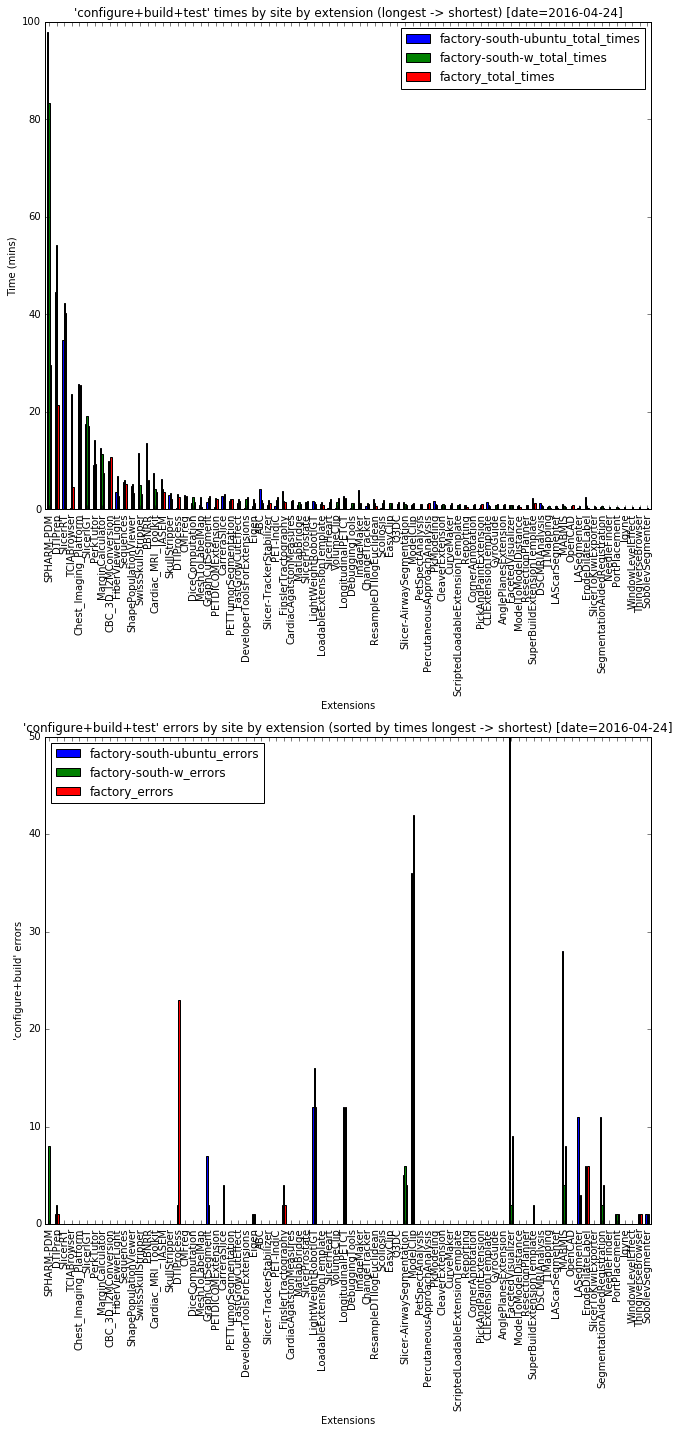

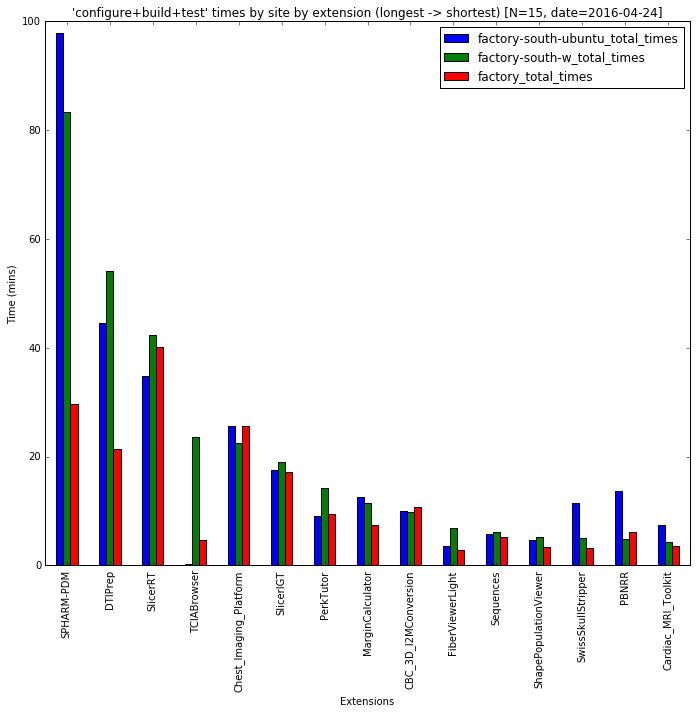

In [12]:
%matplotlib inline

section('plot_1')

import matplotlib.pyplot as plt

figsize = (10, 20)
sharex = False

# fig, axes = plt.subplots(2, sharex=sharex)
# axes_index = iter(range(len(axes)))

# subplot
title = "'configure+build+test' times by site by extension (alphabetical) [date=%s]" % date

time_plot_df = merge(
    [(sites_df.xs((site), level=('sites'))                       # for each site
      [timedelta_columns].sum(axis=1) / np.timedelta64(1, 'm')). # compute total_times <= configure+build+test
     to_frame('%s_total_times' % site)                           # convert from time series and rename
     for site in sites],
    left_index=True, right_index=True                            # finally, merge
).sortlevel(level='names')                                       # and sort

# ax = time_plot_df.plot.bar(ax=axes[next(axes_index)], figsize=figsize, title=title, use_index=True)
# ax.set_xlabel("Extensions")
# ax.set_ylabel("Time (mins)")

# subplot
title = "'configure+build' errors by site by extension (alphabetical) [date=%s]" % date

error_plot_df = merge(
    [(sites_df.xs((site), level=('sites'))                       # for each site
      ['errors']). # compute total_times <= configure+build+test
     to_frame('%s_errors' % site)                                # convert from time series and rename
     for site in sites],
    left_index=True, right_index=True                            # finally, merge
).sortlevel(level='names')                                       # and sort

# ax = error_plot_df.plot.bar(ax=axes[next(axes_index)], figsize=figsize, title=title, use_index=True)
# ax.set_xlabel("Extensions")
# ax.set_ylabel("'configure+build' errors")

#plt.tight_layout()

#-------------------------------------------------------------------------------

fig, axes = plt.subplots(2, sharex=sharex)
axes_index = iter(range(len(axes)))

# subplot
title = "'configure+build+test' times by site by extension (longest -> shortest) [date=%s]" % date

time_plot_df = time_plot_df.sort_values(by='factory-south-w_total_times', ascending=False)

ax = time_plot_df.plot.bar(ax=axes[next(axes_index)], figsize=figsize, title=title, use_index=True)
ax.set_xlabel("Extensions")
ax.set_ylabel("Time (mins)")

# subplot
title = "'configure+build+test' errors by site by extension (sorted by times longest -> shortest) [date=%s]" % date

error_plot_df = error_plot_df.reindex_axis(time_plot_df.index.get_level_values('names'))

ax = error_plot_df.plot.bar(ax=axes[next(axes_index)], figsize=figsize, title=title, use_index=True)
ax.set_xlabel("Extensions")
ax.set_ylabel("'configure+build' errors")

plt.tight_layout()

#-------------------------------------------------------------------------------

fig = plt.figure()
figsize = (10, 10)

number=15
title = "'configure+build+test' times by site by extension (longest -> shortest) [N=%d, date=%s]" % (number, date)

time_plot_df = time_plot_df.head(number)

ax = time_plot_df.plot.bar(figsize=figsize, title=title, use_index=True)
ax.set_xlabel("Extensions")
ax.set_ylabel("Time (mins)")

plt.tight_layout()

Adding <a id='plot_2'></a>


2016-04-24 05:13:32+00:00
2016-04-24 08:17:11+00:00
2016-04-24 06:01:24+00:00


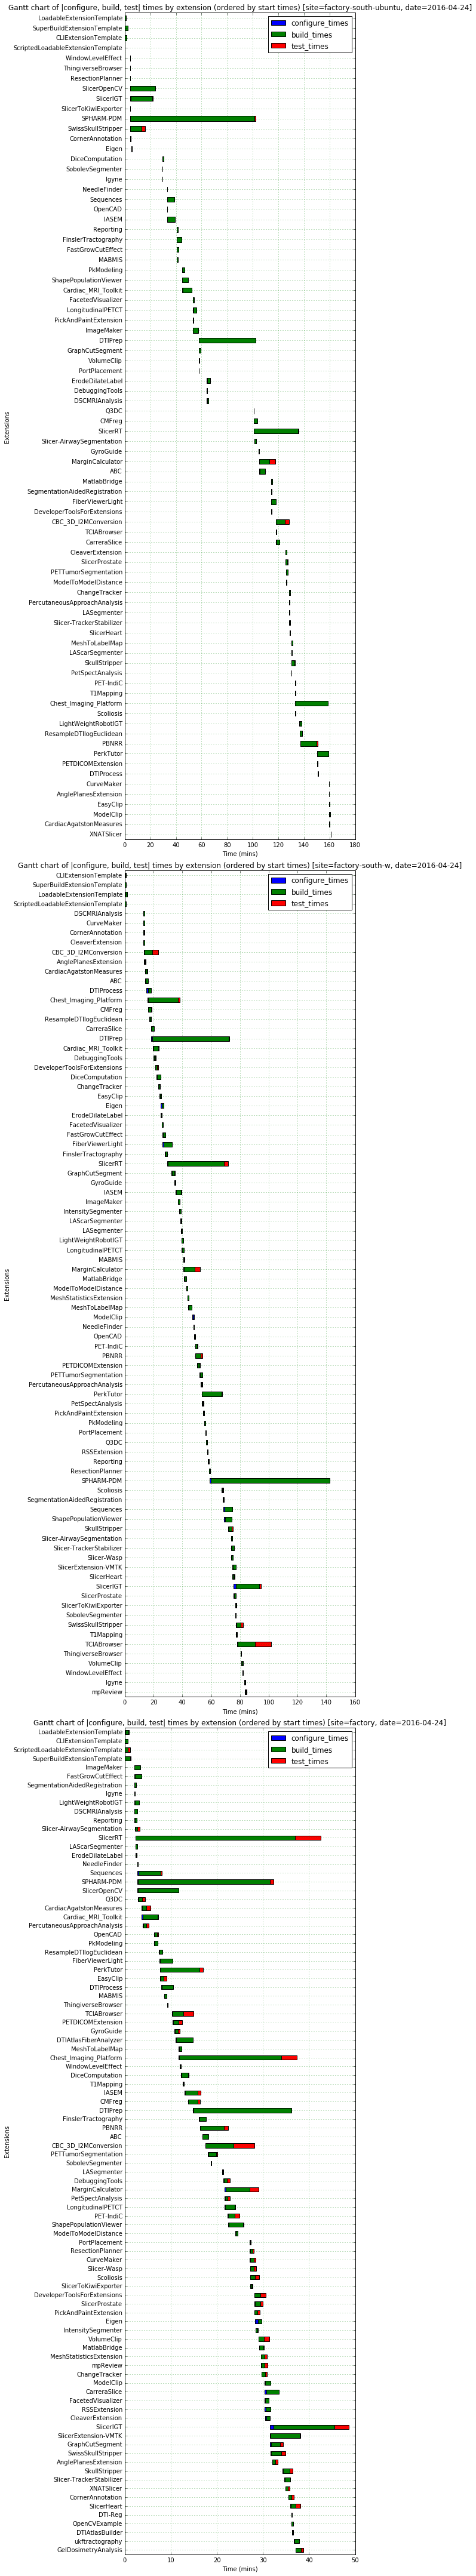

In [13]:

section('plot_2')

figsize = (10, 60)

fig, axes = plt.subplots(len(sites), sharex=False)
axes_index = iter(range(len(axes)))

for site in sites:

    title = "Gantt chart of |configure, build, test| times by extension (ordered by start times) [site=%s, date=%s]" % (site, date)

    # select rows matching 'site'
    sites_sorted_df = sites_df.xs((site), level=('sites')).sort_values(by='start_times', ascending=False)

    time_plot_df = (((sites_sorted_df[timedelta_columns]).
                     apply(lambda td: td / np.timedelta64(1, 'm'))) # convert timedeltas to floats
                   )

    barh_x = sites_sorted_df['start_times']
    print(barh_x.min())
    barh_x = (barh_x - barh_x.min()) / np.timedelta64(1, 'm')

    ax = time_plot_df.plot.barh(
        ax=axes[next(axes_index)],
        figsize=figsize, 
        title=title,
        use_index=True,
        stacked=True,
        left=barh_x)
    ax.set_xlabel("Time (mins)")
    ax.set_ylabel("Extensions")
    ax.grid(color = 'g', linestyle = ':')

plt.tight_layout()